## Kickstarter Project (Machine Learning Project) - October 2023

<a id='about'/>

### About this file

Kickstarter is a popular crowdfunding platform that has helped thousands of entrepreneurs and creators bring their innovative ideas to life. However, not all Kickstarter projects are successful, and understanding the factors that contribute to success or failure can be valuable for both creators and investors alike.

In this dataset, we have collected information on a large number of Kickstarter projects and whether they ultimately succeeded or failed to meet their funding goals. This dataset includes a wide range of project types, including technology startups, creative arts endeavors, and social impact initiatives, among others.

By analyzing this dataset, researchers and analysts can gain insights into the characteristics of successful and unsuccessful Kickstarter projects, such as funding targets, project categories, and funding sources. This information can be used to inform investment decisions and guide future crowdfunding campaigns.

Overall, this dataset provides a comprehensive look at the Kickstarter ecosystem and can serve as a valuable resource for anyone interested in understanding the dynamics of crowdfunding and the factors that contribute to project success or failure.

### TOC (table of content)
0. [About this file](#about)
1. [Load packages](#loading_packages)
2. [Load data](#data_loading)
3. [EDA technical](#EDA_technical)
4. [EDA information](#EDA_info)
5. [Feature engineering](#feature_engineering)
6. [Dummy Classifier](#dummy)
7. [Pipeline + ColumnTransformer](#pipeline)
8. [Evaluation](#evaluation)
9. [Additional Links](#links)
---
10. [Cross-validation](#crossval)
11. [GridSearchCV](#gridsearch)
12. [Set Kaggle solution](#kaggle)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
kickstarter = pd.read_csv('data/kickstarter_projects.csv')

In [4]:
kickstarter['Launched'] = pd.to_datetime(kickstarter['Launched'])
kickstarter['Deadline'] = pd.to_datetime(kickstarter['Deadline'])

In [5]:
kickstarter['Date_launched'] = kickstarter['Launched'].dt.day
kickstarter['Month_launched'] = kickstarter['Launched'].dt.month
kickstarter['Year_launched'] = kickstarter['Launched'].dt.year

In [6]:
kickstarter['Date_crowd'] = kickstarter['Launched'].dt.day
kickstarter['Month_crowd'] = kickstarter['Launched'].dt.month
kickstarter['Year_crowd'] = kickstarter['Launched'].dt.year

In [7]:
kickstarter['Is_Successful'] = kickstarter['State'] == 'Successful'

# Group by Country and Launch_Year and calculate success rate
success_rate_by_country_year = kickstarter.groupby(['Country', 'Year_launched'])['Is_Successful'].mean().reset_index()

In [8]:
success_rate_by_catogery_year = kickstarter.groupby(['Category', 'Year_launched'])['Is_Successful'].mean().reset_index()

In [9]:
kickstarter.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_launched,Month_launched,Year_launched,Date_crowd,Month_crowd,Year_crowd,Is_Successful
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,21,4,2009,21,4,2009,False
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,23,4,2009,23,4,2009,False
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,24,4,2009,24,4,2009,True
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,25,4,2009,25,4,2009,True
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,27,4,2009,27,4,2009,False


In [10]:
kickstarter.isna().sum()

ID                0
Name              0
Category          0
Subcategory       0
Country           0
Launched          0
Deadline          0
Goal              0
Pledged           0
Backers           0
State             0
Date_launched     0
Month_launched    0
Year_launched     0
Date_crowd        0
Month_crowd       0
Year_crowd        0
Is_Successful     0
dtype: int64

In [11]:
(kickstarter['Goal'] < 550).sum()

31225

In [12]:
kickstarter.shape

(374853, 18)

In [13]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              374853 non-null  int64         
 1   Name            374853 non-null  object        
 2   Category        374853 non-null  object        
 3   Subcategory     374853 non-null  object        
 4   Country         374853 non-null  object        
 5   Launched        374853 non-null  datetime64[ns]
 6   Deadline        374853 non-null  datetime64[ns]
 7   Goal            374853 non-null  int64         
 8   Pledged         374853 non-null  int64         
 9   Backers         374853 non-null  int64         
 10  State           374853 non-null  object        
 11  Date_launched   374853 non-null  int32         
 12  Month_launched  374853 non-null  int32         
 13  Year_launched   374853 non-null  int32         
 14  Date_crowd      374853 non-null  int

In [14]:
kickstarter.describe(include='all')

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_launched,Month_launched,Year_launched,Date_crowd,Month_crowd,Year_crowd,Is_Successful
count,3.748530e+05,374853,374853,374853,374853,374853,374853,3.748530e+05,3.748530e+05,374853.000000,374853,374853.000000,374853.000000,374853.000000,374853.000000,374853.000000,374853.000000,374853
unique,NaN,372061,15,159,22,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,New EP/Music Development,Film & Video,Product Design,United States,NaN,NaN,NaN,NaN,NaN,Failed,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,13,62694,22310,292618,NaN,NaN,NaN,NaN,NaN,197611,NaN,NaN,NaN,NaN,NaN,NaN,241002
mean,1.074656e+09,NaN,NaN,NaN,NaN,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359,NaN,15.294462,6.464737,2014.241428,15.294462,6.464737,2014.241428,NaN
min,5.971000e+03,NaN,NaN,NaN,NaN,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000,NaN,1.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,NaN
25%,5.380728e+08,NaN,NaN,NaN,NaN,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000,NaN,8.000000,4.000000,2013.000000,8.000000,4.000000,2013.000000,NaN
50%,1.075300e+09,NaN,NaN,NaN,NaN,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000,NaN,15.000000,7.000000,2014.000000,15.000000,7.000000,2014.000000,NaN
75%,1.610149e+09,NaN,NaN,NaN,NaN,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000,NaN,23.000000,9.000000,2016.000000,23.000000,9.000000,2016.000000,NaN
max,2.147476e+09,NaN,NaN,NaN,NaN,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000,NaN,31.000000,12.000000,2018.000000,31.000000,12.000000,2018.000000,NaN


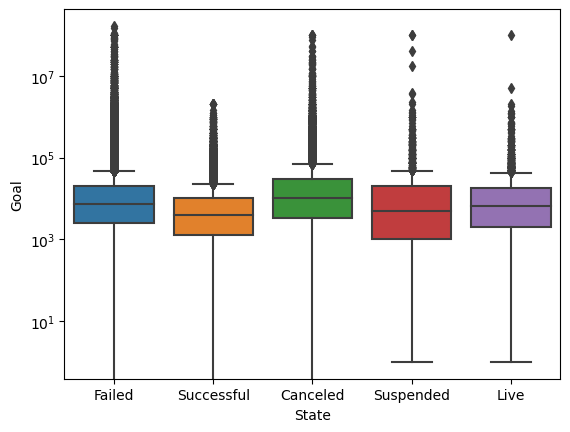

In [15]:
#Distribution of Goal with the status of the company after funding round

sns.boxplot(kickstarter, x='State', y='Goal')
plt.yscale('log')

#Its in the log scale to visualize the large dataset.

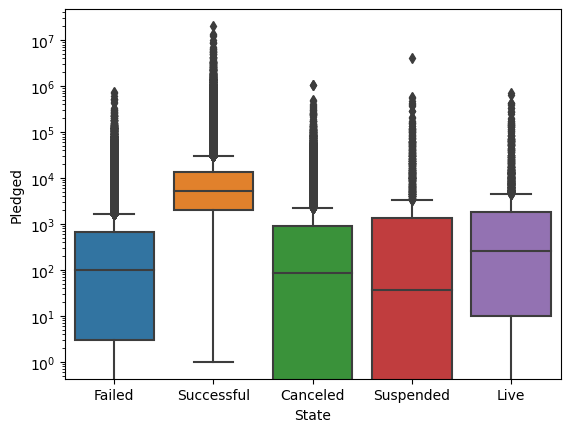

In [16]:
sns.boxplot(kickstarter, x='State', y='Pledged')
plt.yscale('log')

In [17]:
kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [18]:
kickstarter.isna().value_counts()

ID     Name   Category  Subcategory  Country  Launched  Deadline  Goal   Pledged  Backers  State  Date_launched  Month_launched  Year_launched  Date_crowd  Month_crowd  Year_crowd  Is_Successful
False  False  False     False        False    False     False     False  False    False    False  False          False           False          False       False        False       False            374853
Name: count, dtype: int64

In [19]:
kickstarter.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State', 'Date_launched',
       'Month_launched', 'Year_launched', 'Date_crowd', 'Month_crowd',
       'Year_crowd', 'Is_Successful'],
      dtype='object')

#### Columns:

- 'ID':             ID
- 'Name':           Name
- 'Category':       Category
- 'Subcategory':    Subcategory
- 'Country':        Country of product origin
- 'Launched':       Date the project was launched
- 'Deadline':       Deadline for crowdfunding
- 'Goal':           Amount of money the creater needs to complete the project (USD)
- 'Pledged':        Amount of money pledged to by the crowd (USD)
- 'Backers':        Number of backers
- 'State':          Current condition the project is in (as of 2018-01-02) ('Failed', 'Successful', 'Canceled', 'Suspended', 'Live')

In [20]:
kickstarter.loc[kickstarter['ID'].duplicated()]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_launched,Month_launched,Year_launched,Date_crowd,Month_crowd,Year_crowd,Is_Successful


In [21]:
kickstarter['Category'].nunique()

15

In [22]:
kickstarter['Subcategory'].unique()

array(['Fashion', 'Shorts', 'Illustration', 'Software', 'Journalism',
       'Fiction', 'Theater', 'Rock', 'Photography', 'Puzzles',
       'Graphic Design', 'Film & Video', 'Publishing', 'Documentary',
       'Sculpture', 'Electronic Music', 'Nonfiction', 'Food', 'Painting',
       'Indie Rock', 'Video Games', 'Public Art', 'Product Design', 'Art',
       "Children's Books", 'Crafts', 'Jazz', 'Music', 'Comics',
       'Narrative Film', 'Tabletop Games', 'Digital Art', 'Animation',
       'Conceptual Art', 'Pop', 'Hip-Hop', 'Country & Folk',
       'Periodicals', 'Webseries', 'Performance Art', 'Technology',
       'Art Books', 'World Music', 'Knitting', 'Classical Music',
       'Poetry', 'Graphic Novels', 'Radio & Podcasts', 'Design',
       'Hardware', 'Webcomics', 'Dance', 'Translations', 'Crochet',
       'Games', 'Photo', 'Mixed Media', 'Space Exploration', 'Photobooks',
       'Musical', 'Audio', 'Community Gardens', 'R&B',
       'Fabrication Tools', 'Textiles', 'Architecture',

In [23]:
kickstarter['Subcategory'].nunique()

159

In [24]:
kickstarter['ID'].duplicated().sum()

0

Text(0, 0.5, 'Count')

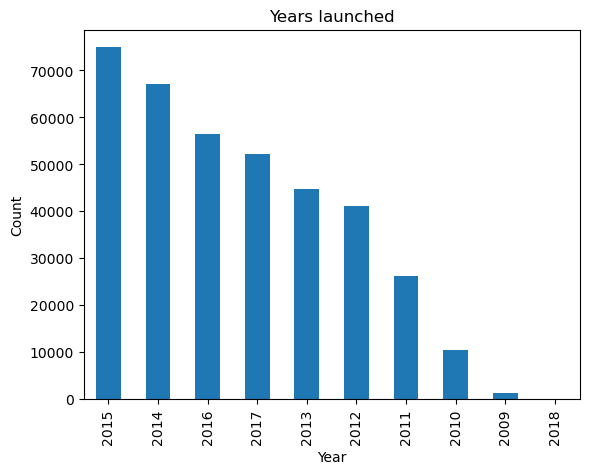

In [25]:
ax = kickstarter['Year_launched'].value_counts().plot(kind='bar', title= 'Years launched')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

<Axes: xlabel='Year_launched', ylabel='Count'>

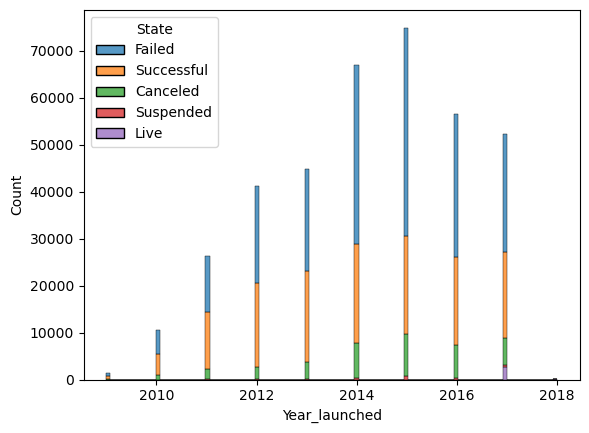

In [26]:
sns.histplot(data=kickstarter, x='Year_launched',hue='State',multiple="stack")

Text(0, 0.5, 'Count')

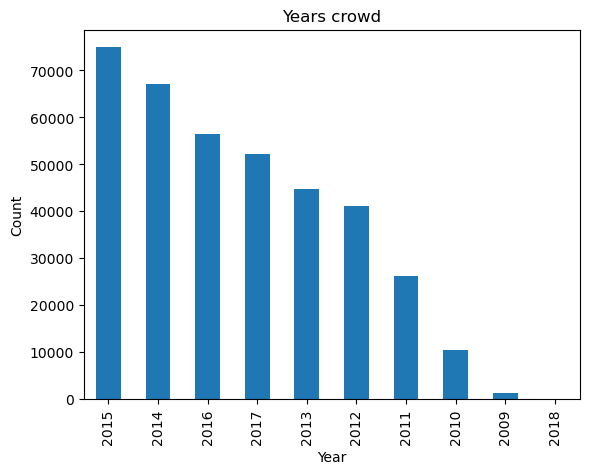

In [27]:
ax = kickstarter['Year_crowd'].value_counts().plot(kind='bar', title= 'Years crowd')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

<Axes: xlabel='Year_crowd', ylabel='Count'>

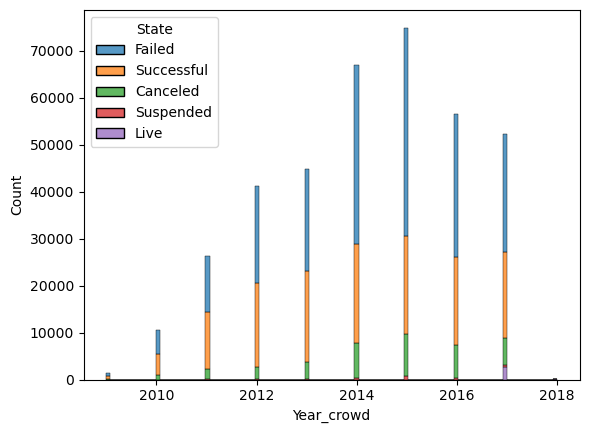

In [28]:
sns.histplot(data=kickstarter, x='Year_crowd',hue='State',multiple="stack")

Text(0, 0.5, 'Count')

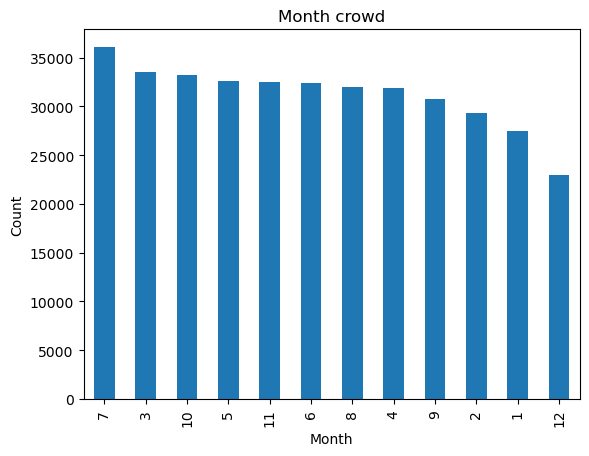

In [29]:
ax = kickstarter['Month_crowd'].value_counts().plot(kind='bar', title= 'Month crowd')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

<Axes: xlabel='Month_crowd', ylabel='Count'>

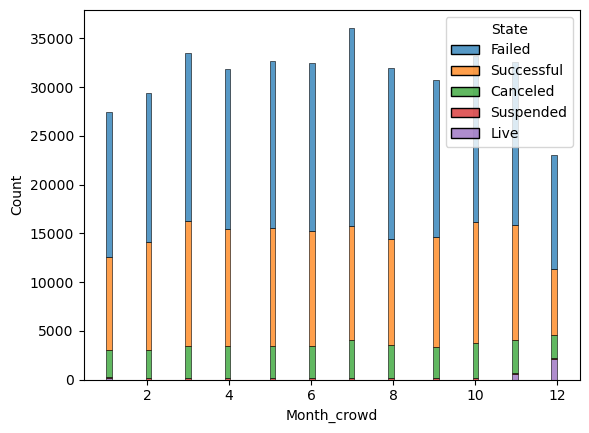

In [30]:
sns.histplot(data=kickstarter, x='Month_crowd',hue='State',multiple="stack")

Text(0, 0.5, 'Count')

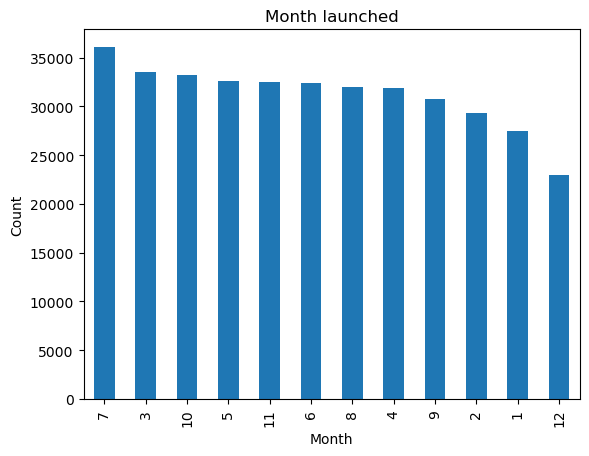

In [31]:
ax = kickstarter['Month_launched'].value_counts().plot(kind='bar', title= 'Month launched')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

In [40]:
kickstarter.query('State == "Failed" and State == "Successful"')

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_launched,Month_launched,Year_launched,Date_crowd,Month_crowd,Year_crowd,Is_Successful
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,21,4,2009,21,4,2009,False
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,23,4,2009,23,4,2009,False
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,27,4,2009,27,4,2009,False
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,29,4,2009,29,4,2009,False
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,29,4,2009,29,4,2009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373944,1705137357,Center Touching Center - A Book of Poetry,Publishing,Publishing,United States,2017-12-19 04:10:24,2017-12-28,3700,0,0,Failed,19,12,2017,19,12,2017,False
374004,1100181726,Savage in Limbo,Theater,Theater,Canada,2017-12-19 18:18:45,2018-01-01,2398,160,2,Failed,19,12,2017,19,12,2017,False
374048,1924831776,No Fix?,Film & Video,Documentary,United States,2017-12-20 03:14:24,2018-01-01,20000,0,0,Failed,20,12,2017,20,12,2017,False
374049,201146560,No Label In Home Studio - The Future of Music,Music,Music,United States,2017-12-20 03:19:03,2017-12-31,3500,0,0,Failed,20,12,2017,20,12,2017,False


/var/folders/y_/nw3fqlzd7yb1yprh75g9wpkw0000gn/T/ipykernel_1249/1876345385.py:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,23000,5000)


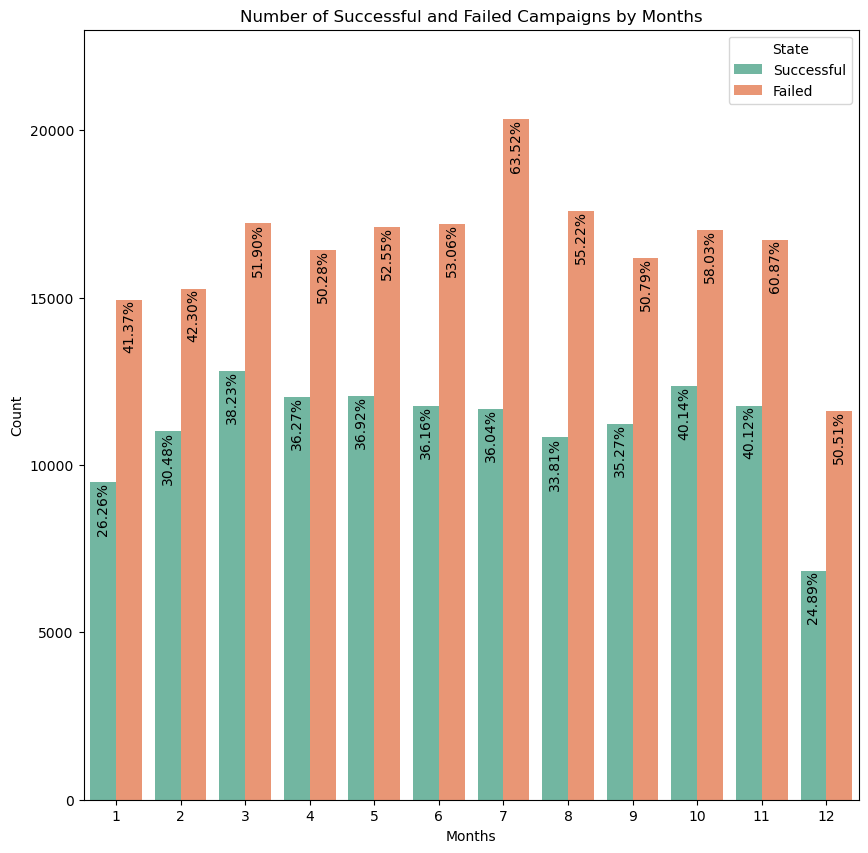

In [90]:
data1 = kickstarter.query('State == "Failed" or State == "Successful"')
order = kickstarter['Month_launched'].value_counts().index
hue_order = ['Successful', 'Failed']
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=data1, x='Month_launched', hue='State', palette='Set2', hue_order=hue_order)

# Calculate the relative percentages for each category
category_counts = kickstarter['Month_launched'].value_counts()
for p in ax.patches:
    height = p.get_height()
    category = p.get_x()
    ax.text(category + p.get_width() / 2, height + 10 , f'{height / category_counts[order[int(category)]]:.2%}', ha='center', va='top', rotation=90)

# Add labels and title
plt.ylim(0,23000,5000)
plt.ylabel('Count')
plt.xlabel('Months')
plt.title('Number of Successful and Failed Campaigns by Months')
plt.legend(title='State', labels=['Successful','Failed'])
plt.show()


# Cancell the others(live)

In [ ]:
#sns.pairplot(kickstarter,
 #            vars=['Year_launched','Year_crowd',
#                   'Goal','Pledged','Backers'],
 #           hue='State')
#plt.show()

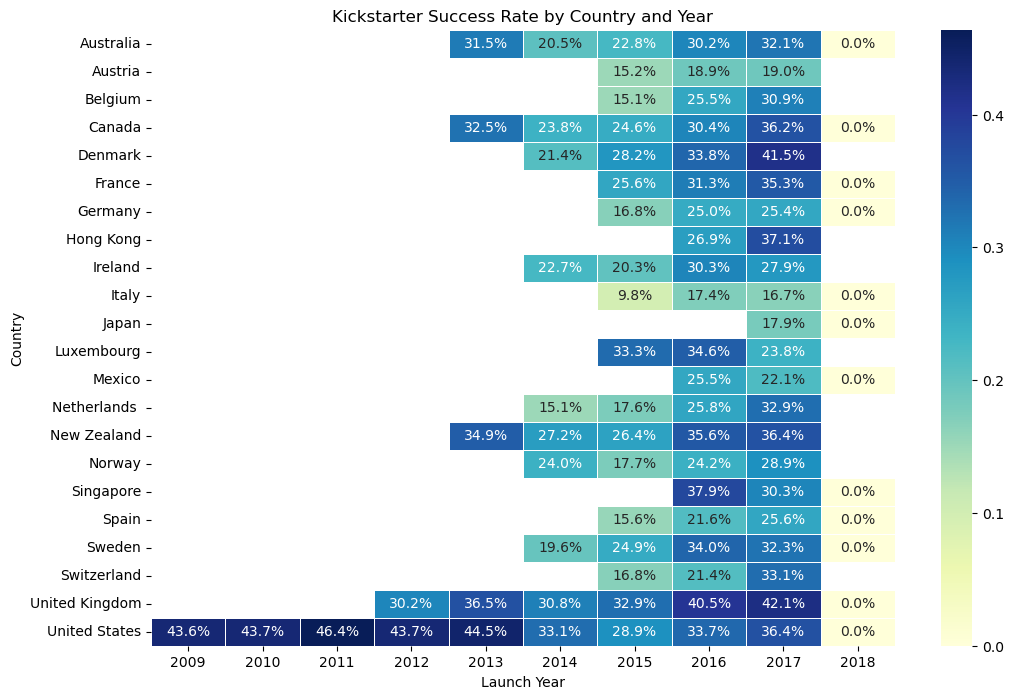

In [ ]:


# Create a pivot table
pivot_table = success_rate_by_country_year.pivot_table(index='Country', columns='Year_launched', values='Is_Successful', aggfunc='mean')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=.5)
plt.title('Kickstarter Success Rate by Country and Year')
plt.xlabel('Launch Year')
plt.ylabel('Country')
plt.show()

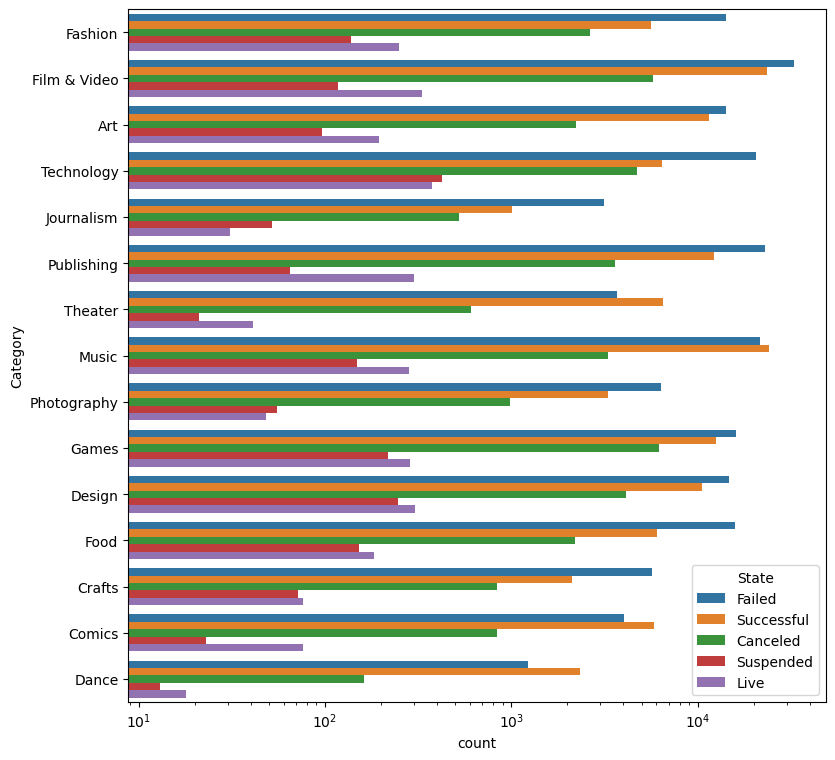

In [ ]:
plt.figure(figsize=(9, 9))
sns.countplot(kickstarter, y='Category', hue='State')
plt.xscale('log')

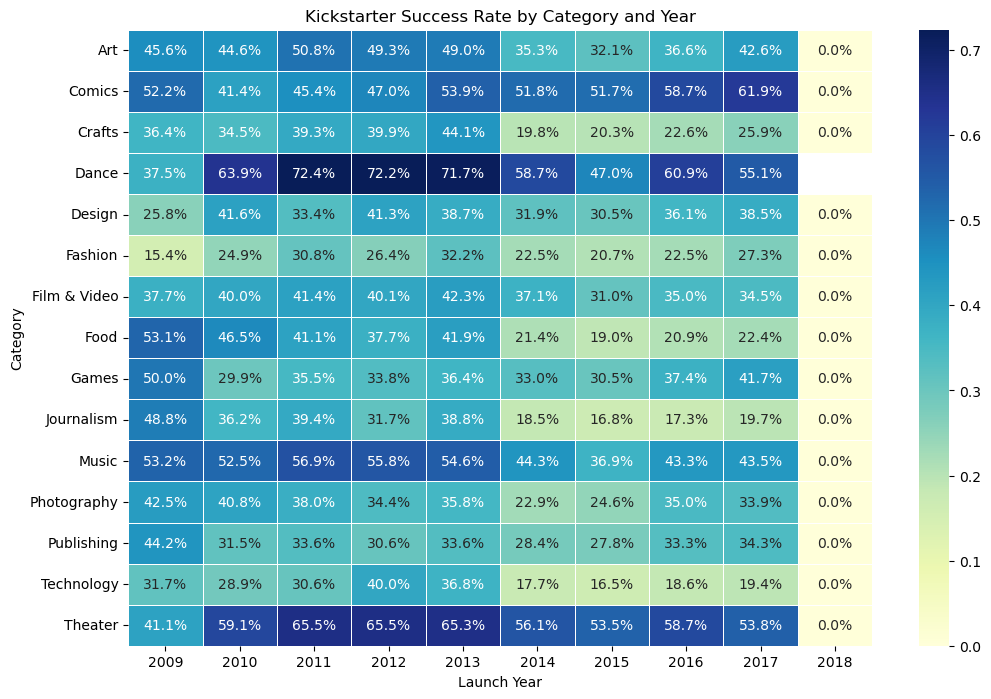

In [ ]:
# Create a pivot table
pivot_table1 = success_rate_by_catogery_year.pivot_table(index='Category', columns='Year_launched', values='Is_Successful', aggfunc='mean')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table1, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=.5)
plt.title('Kickstarter Success Rate by Category and Year')
plt.xlabel('Launch Year')
plt.ylabel('Category')
plt.show()

In [ ]:
kickstarter1 = kickstarter.query("Pledged >= Goal and State != 'Successful'")

In [ ]:
kickstarter1.shape

(1441, 18)